# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [3]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable
titanic.select_dtypes(exclude=object).head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [6]:
#your code here- categorical variable
titanic.select_dtypes(exclude=['int','float']).head(3)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [7]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

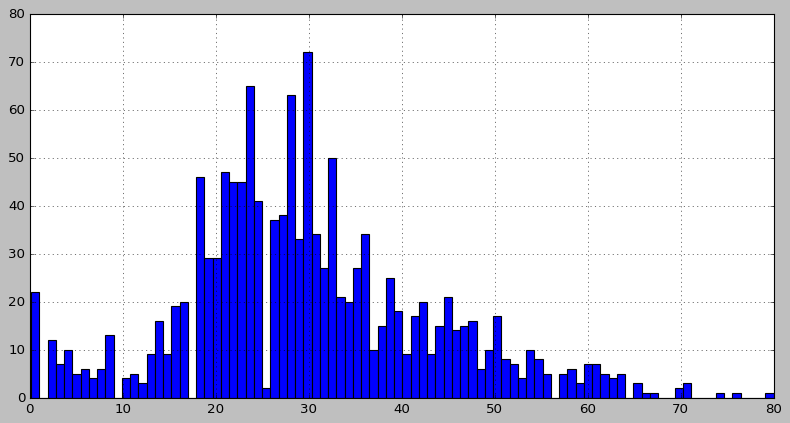

In [8]:
titanic['Age'].hist(bins=90)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

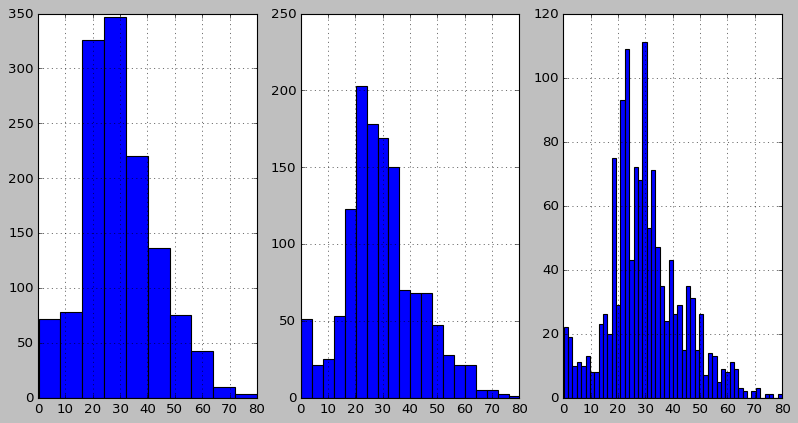

In [9]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist() #default bins

plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)

plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)

#### Whether the bin size affects your plot? Why?

A medida que aumenta el número de bins, el perfil del histograma es más abrupto ya que se recogen de forma más detallada los distintos valores de la serie


#### Use seaborn to show the distribution of the column `Age`

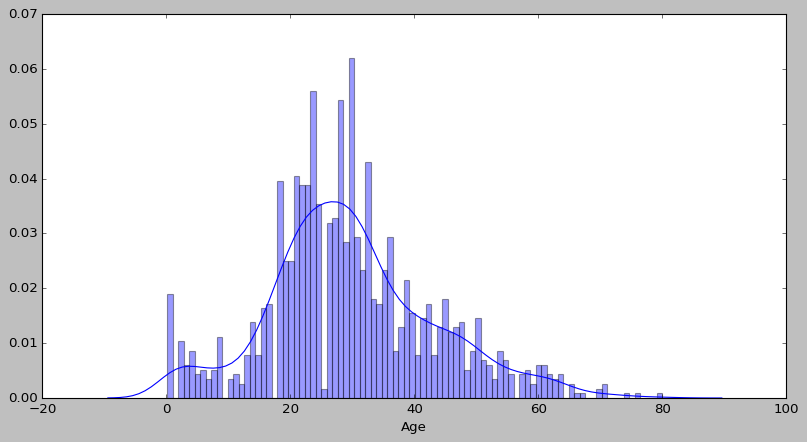

In [11]:
# your code here
sns.distplot(titanic['Age'],bins=90)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0, 0.5, 'Count')

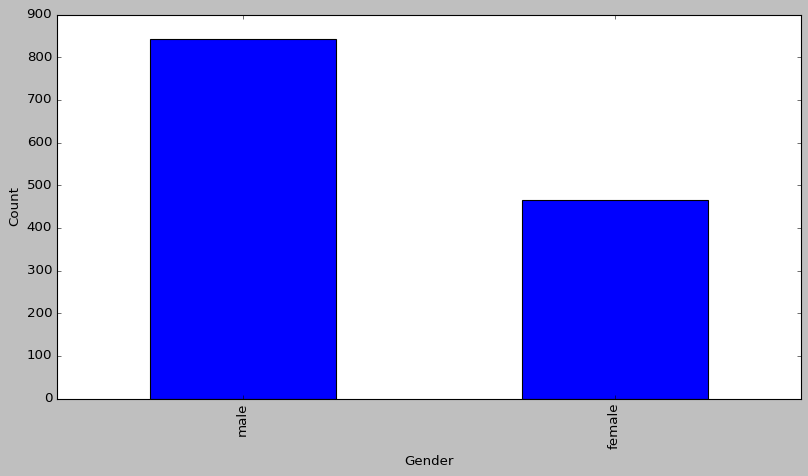

In [12]:
titanic['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

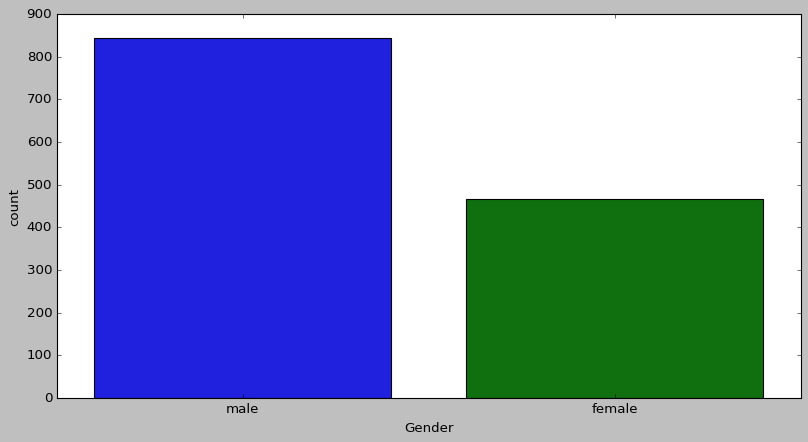

In [13]:
sns.countplot(x='Gender',data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0, 0.5, 'Count')

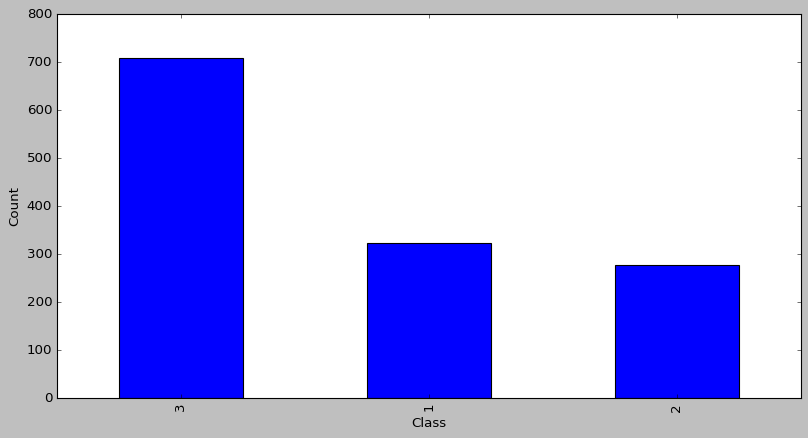

In [14]:
titanic['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

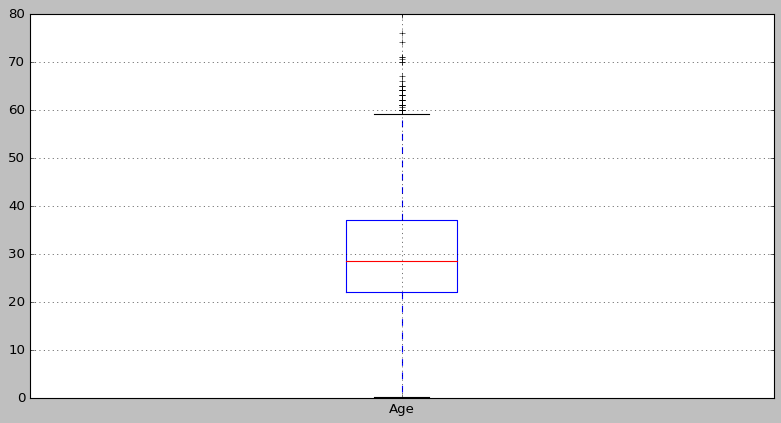

In [15]:
titanic.boxplot(column='Age')

#### What does the previous plot tell you about the feature `Age`? Comment.

El valor medio de la edad es unos 29.5 años, estando el máximo en 80 y el mínimo en 0. Los valores intercuartílicos están entre 21 y 38 años (50% del total de la muestra).


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

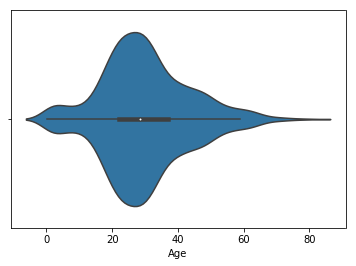

In [4]:
sns.violinplot("Age", data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

Se puede observar una capa adicional que indical aquellos valores que represetan el 95% de probabilidad de aparecer.


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

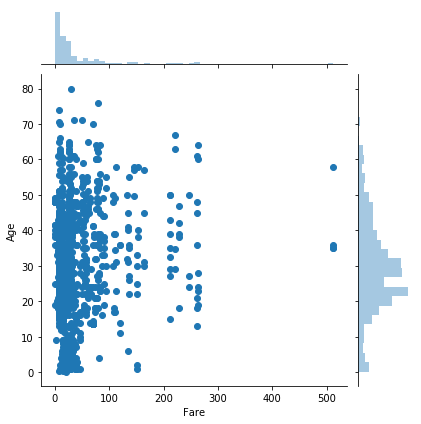

In [5]:
#your code-1st way
sns.jointplot(x='Fare',y='Age',data=titanic)

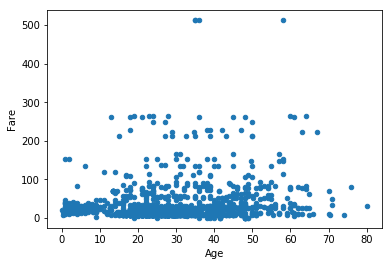

In [8]:
# your code-2nd way
titanic.plot.scatter(x = 'Age', y = 'Fare')

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

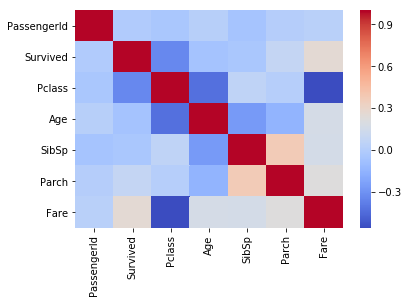

In [9]:
sns.heatmap(titanic.corr(),cmap='coolwarm')

#### According to the previous plot, what are the most correlated feature? Comment.

De acuerdo a los colores, las mayores correlaciones son:
    - Parch - SibSp
    - Fare - Survived


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

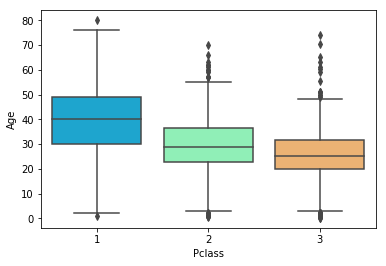

In [10]:
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow')

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

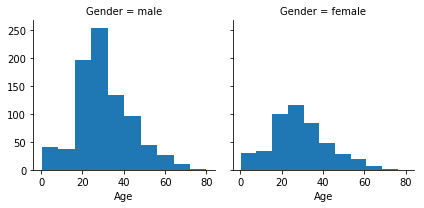

In [19]:
chart = sns.FacetGrid(data=titanic,col='Gender')
chart.map(plt.hist,'Age')